In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'x'
df = pd.read_csv(file_path)
import warnings

warnings.filterwarnings('ignore')
sns.set_style()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [4]:
import numpy as np
import pandas as pd
from scipy.stats import yeojohnson, shapiro, kurtosis


numeric_columns = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 
                   'coarseaggregate', 'fineaggregate', 'age', 'csMPa']

def apply_yeojohnson_and_evaluate(df, column_name):

    data = df[column_name]
    
   
    transformed_data, lambda_value = yeojohnson(data)
    
   
    stat_original, p_original = shapiro(data)
    stat_transformed, p_transformed = shapiro(transformed_data)
    

    original_kurtosis = kurtosis(data)
    transformed_kurtosis = kurtosis(transformed_data)

   
    print(f"{column_name} - Yeo-Johnson Öncesi Shapiro-Wilk Testi: Stat={stat_original:.3f}, p={p_original:.3f}")
    print(f"{column_name} - Yeo-Johnson Sonrası Shapiro-Wilk Testi: Stat={stat_transformed:.3f}, p={p_transformed:.3f}")
    
    if p_original < 0.05:
        print(f"{column_name} - Yeo-Johnson Öncesi: Normal Dağılıma Uymuyor.")
    else:
        print(f"{column_name} - Yeo-Johnson Öncesi: Normal Dağılıma Uygun.")
    
    if p_transformed < 0.05:
        print(f"{column_name} - Yeo-Johnson Sonrası: Normal Dağılıma Uymuyor.")
    else:
        print(f"{column_name} - Yeo-Johnson Sonrası: Normal Dağılıma Uygun.")
    

    print(f"{column_name} - Yeo-Johnson Öncesi Kurtosis: {original_kurtosis:.3f}")
    print(f"{column_name} - Yeo-Johnson Sonrası Kurtosis: {transformed_kurtosis:.3f}")
    print("="*50)


for column in numeric_columns:
    apply_yeojohnson_and_evaluate(df, column)


cement - Yeo-Johnson Öncesi Shapiro-Wilk Testi: Stat=0.959, p=0.000
cement - Yeo-Johnson Sonrası Shapiro-Wilk Testi: Stat=0.980, p=0.000
cement - Yeo-Johnson Öncesi: Normal Dağılıma Uymuyor.
cement - Yeo-Johnson Sonrası: Normal Dağılıma Uymuyor.
cement - Yeo-Johnson Öncesi Kurtosis: -0.524
cement - Yeo-Johnson Sonrası Kurtosis: -0.878
slag - Yeo-Johnson Öncesi Shapiro-Wilk Testi: Stat=0.812, p=0.000
slag - Yeo-Johnson Sonrası Shapiro-Wilk Testi: Stat=0.745, p=0.000
slag - Yeo-Johnson Öncesi: Normal Dağılıma Uymuyor.
slag - Yeo-Johnson Sonrası: Normal Dağılıma Uymuyor.
slag - Yeo-Johnson Öncesi Kurtosis: -0.512
slag - Yeo-Johnson Sonrası Kurtosis: -1.869
flyash - Yeo-Johnson Öncesi Shapiro-Wilk Testi: Stat=0.762, p=0.000
flyash - Yeo-Johnson Sonrası Shapiro-Wilk Testi: Stat=0.665, p=0.000
flyash - Yeo-Johnson Öncesi: Normal Dağılıma Uymuyor.
flyash - Yeo-Johnson Sonrası: Normal Dağılıma Uymuyor.
flyash - Yeo-Johnson Öncesi Kurtosis: -1.328
flyash - Yeo-Johnson Sonrası Kurtosis: -1.937
w

##### Normal dağılmayan veriye box-cox , Yeo-Johnson gibi dönüşümler uygulasak da normal dağılıma uymamayı bırakalım normal dağılıma yaklasmıyor bu yüzden model kurarken normal dağılım şartı aramayan modeller tercih etmemiz daha iyi olacak

#### Scale işlemi

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler



numeric_columns = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 
                   'coarseaggregate', 'fineaggregate', 'age', 'csMPa']


scaler = StandardScaler()
df_scaled_standard = df.copy() 
df_scaled_standard[numeric_columns] = scaler.fit_transform(df[numeric_columns])


scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy()  
df_scaled_minmax[numeric_columns] = scaler_minmax.fit_transform(df[numeric_columns])


print("Orijinal Veri (ilk 5 satır):")
print(df.head())

print("\nStandardized Veri (ilk 5 satır):")
print(df_scaled_standard.head())

print("\nMinMax Normalize Veri (ilk 5 satır):")
print(df_scaled_minmax.head())


Orijinal Veri (ilk 5 satır):
   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30  

Standardized Veri (ilk 5 satır):
     cement      slag    flyash     water  superplasticizer  coarseaggregate  \
0  2.477915 -0.856888 -0.847144 -0.916764         -0.620448         0.863154   
1  2.477915 -0.856888 -0.847144 -0.916764         -0.620448         1.056164   
2  0.491425  0.795526 -0.847144  2.175461         -1.039143        -0.526517   
3  0.49142

- StandardScaler: Verilerin ortalama 0 ve standart sapması 1 olacak şekilde standardize edilmesini sağlar. Bu, özellikle doğrusal modellerde ve bazı algoritmalarda (örneğin, lineer regresyon, Lojistik Regresyon, SVM, K-NN) yaygın olarak kullanılır.

- MinMaxScaler: Verileri 0 ile 1 arasında normalize eder. Bu, özellikle sinir ağları gibi algoritmalarla çalışırken yaygın kullanılır.

#### Outlier tespiti için her iki ölçekleme yöntemi de kullanılabilir, ancak burada birkaç önemli nokta bulunuyor:

StandardScaler: Özelliklerin ortalama 0 ve standart sapması 1 olacak şekilde ölçeklendiği için, veri setinizdeki büyük farklar daha belirgin hale gelir. Bu sayede, bazı outlier'lar daha kolay fark edilebilir. Yani, outlier'lar ve verilerin normal dağılımındaki farkları anlamak açısından StandardScaler daha uygun olabilir.

MinMaxScaler: Verileri 0 ile 1 arasında normalize eder, bu nedenle verinizdeki sadece mutlak aralık farklarına duyarlıdır. Yani, çok uç noktalara sahip veriler min-max ölçeklemesi sırasında daha dar bir alanda sıkışabilir, bu da outlier tespitinin biraz zorlaşmasına neden olabilir.

Genel olarak, outlier tespiti için genellikle StandardScaler ile ölçekleme tercih edilir çünkü bu, verilerdeki önemli sapmaları daha belirgin kılar.

In [10]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np


isolation_forest = IsolationForest(contamination=0.05, random_state=42) 


outliers = isolation_forest.fit_predict(df)


outliers = pd.Series(outliers, index=df.index)


df_without_outliers = df[outliers == 1] 


print(f"Outliers removed. New number of rows: {df_without_outliers.shape[0]}")


Outliers removed. New number of rows: 978


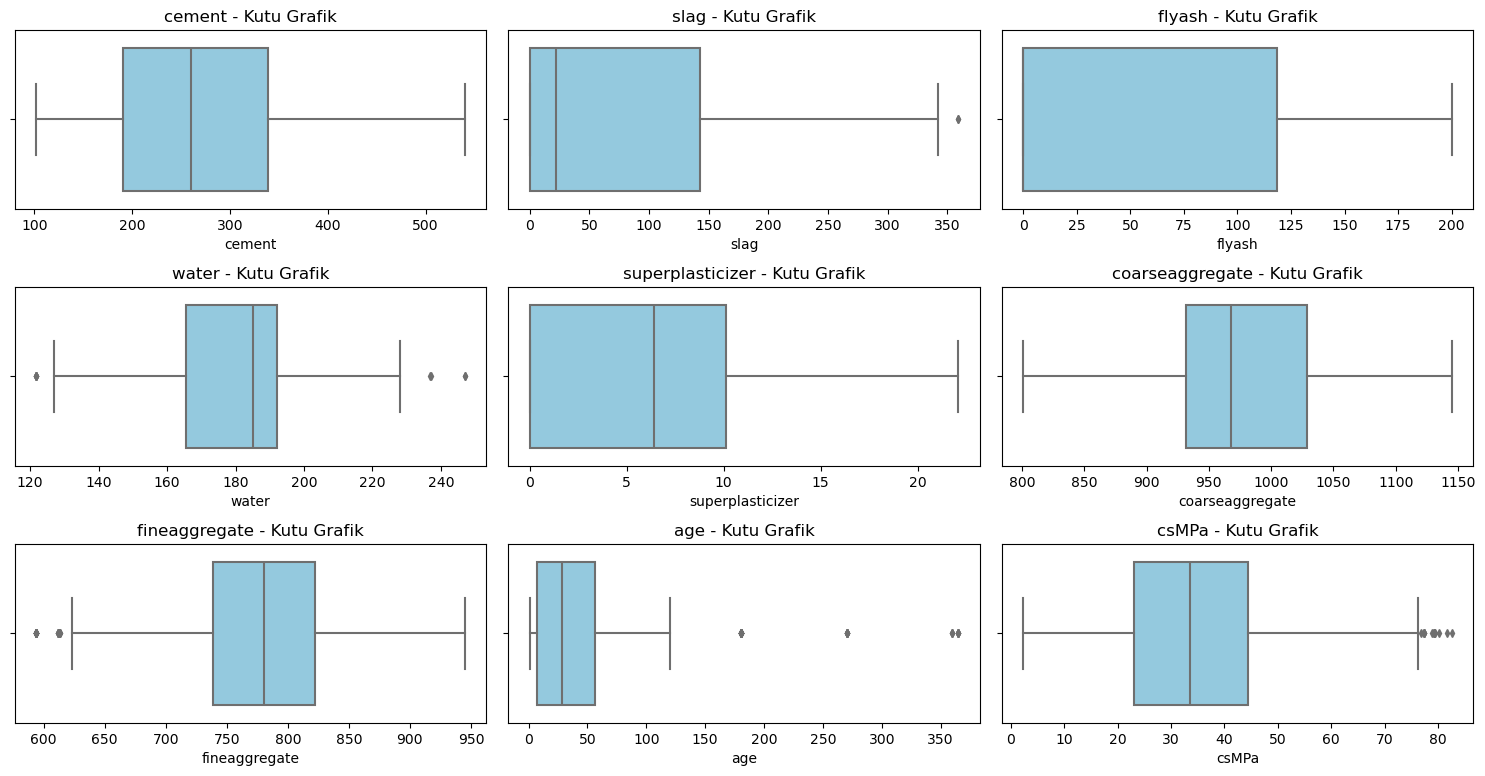

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))


for i, column in enumerate(df_without_outliers.columns):
    plt.subplot(4, 3, i+1)  
    sns.boxplot(x=df_without_outliers[column], color='skyblue', fliersize=4)
    plt.title(f'{column} - Kutu Grafik')

plt.tight_layout()
plt.show()

-  Bir çok aykırı gözlem analizini yaptıktan sonra parametrelerle oynasak bile özellikle age ve csmpa değşkenleri için aykırı değerlerden kurtulmak pek mümkün olmadı 

-  Model kullanırken aykırı verilerden etkilenmeyen modeller seçeceğiz



## Değişken Dönüşümü Konusu Ve Model Kurmadan Önce Genel bir Özet

### Beton, temel olarak çimento, su, agregalar (kum ve taş) ve katkı maddelerinden oluşur.

##### Betonun Genel İçeriği (Yaklaşık Oranlar):

-  Çimento: %10 - %15

      Betonun bağlayıcı maddesi olarak işlev görür.
      
      Çimento, suyla reaksiyona girerek betonun sertleşmesini sağlar.
      
- Su: %15 - %20

    Su, çimentonun kimyasal reaksiyona girmesi ve betonu sertleştirmesi için gereklidir.
    Su/Çimento oranı (W/C) genellikle betonun dayanımını etkileyen önemli bir parametredir. Bu oranı değiştirmek, betonun sertleşme hızı ve dayanımını etkiler.
    Agrega: %65 - %75

- Kaba agregalar (çakıl veya taş): %40 - %60
         İnce agregalar (kum): %20 - %30
         Agrega, betonun dayanıklılığını ve hacmini artıran ana malzemedir.
         Kaba agregalar betonun yapısal gücünü sağlarken, ince agregalar ise betonun daha homojen ve pürüzsüz olmasına yardımcı olur.
         Katkı Maddeleri: %0 - %10

- Betonun özelliklerini iyileştirmek amacıyla kullanılan kimyasal veya mineral katkılardır. 
   - Örneğin:
   
         Süperplastikleştiriciler:Betonun işlenebilirliğini artırır.
         
         Hava sürükleyici katkılar: Donma-çözülme direncini artırır.
         
         Pozzolanlar (slag, volkanik kül vb.): Çimentonun dayanımını artırabilir ve çevresel etkileri azaltabilir.
         

In [15]:
import pandas as pd


data = {
    'Feature': ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age'],
    '5 lowest strength': [125.44, 162.66, 0.00, 198.90, 0.00, 928.64, 856.54, 3.00],
    '5 greatest strength': [391.70, 159.56, 0.00, 156.52, 12.54, 1000.42, 718.50, 51.80]
}


df_comparison = pd.DataFrame(data)


print(df_comparison)




            Feature  5 lowest strength  5 greatest strength
0            cement             125.44               391.70
1              slag             162.66               159.56
2            flyash               0.00                 0.00
3             water             198.90               156.52
4  superplasticizer               0.00                12.54
5   coarseaggregate             928.64              1000.42
6     fineaggregate             856.54               718.50
7               age               3.00                51.80


Çarprazlama yaptığımızda 5 en düşük dayanıma sahip beton karotunun ve 5 en yüksek dayanıma sahip beton karotunun bileşenlerinin ortalama miktarını görüyoruz.
Burada en çok dikkatimizi çeken betonun su ve çimento ilişkisi oluyor çimento miktarı artarken dayanım artıyor gibi gözüküyorken su miktarı azalırken de aynı dayanım artışını gözlemiyoruz.

##### Genel olarak verimiz normal dağılımdan uzak age değişkeni hariç (şiddetli sağa çarpık ve sivri) basıklık yok hafif sağa çarpık şekilinde seyrediyor normal dağılım için yaptığımız dönüşümler basarılı olmadığı için bir kaç yöntem denediğimize rağmen outlierlar konusunda çok da basarı elde edemedik (toplam 1030 satır var ) veri sayısal değerlerden oluştuğu için iki ayrı scale methodu uyguladık model seçerken normal dağılım çarpıklık ve outlier gibi konulardan etkilenmeyen modeller seçeceğiz

In [18]:
df_scaled_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   float64
 8   csMPa             1030 non-null   float64
dtypes: float64(9)
memory usage: 72.6 KB


# Model Aşaması

## XGBoost

In [21]:
###pip install xgboost


In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = df_scaled_standard.drop(columns=['csMPa']) 
y = df_scaled_standard['csMPa']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 0.2778058958917684


#### Hiperparametre Ayarlamaları

In [24]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'n_estimators': [50, 100, 200] 
}


grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)


grid_search.fit(X_train, y_train)


print(f"En iyi parametreler: {grid_search.best_params_}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
En iyi parametreler: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


### 1. max_depth (Maksimum Derinlik)

Anlamı: Ağaçların maksimum derinliğini belirler. Yani, her bir karar ağacı kaç katmanlı (derinlikli) olacak.

Düşük değerler (örneğin: 3-5): Ağaçlar daha sığ olur ve daha genel (basit) model oluşturur. Bu durum, underfitting'e (yetersiz öğrenme) neden olabilir.

Yüksek değerler (örneğin: 7 ve üzeri): Ağaçlar daha derin ve daha karmaşık olur. Bu, modelin overfitting'e (aşırı öğrenme) daha yatkın olmasına yol açabilir, çünkü 
model eğitim verisine çok iyi uyum sağlar ancak genelleme yeteneği zayıflar.

Overfitting ile ilişkisi: Derin ağaçlar, eğitim verisine çok iyi uyum sağlar, ancak yeni, görülmemiş veriler üzerinde kötü performans gösterebilir. Bu, overfitting'i artırabilir. Daha düşük derinlik genellikle daha genelleştirilebilir bir model sunar.

Veri tipi ve boyutu: Genellikle sayısal ve yüksek boyutlu veri setlerinde daha derin ağaçlar kullanmak uygun olabilir, ancak çok büyük veri setlerinde ve çok fazla özellik varsa, düşük derinlik tercih edilebilir.

### 2. learning_rate (Öğrenme Oranı)

Anlamı: Her bir ağaç tarafından yapılan hata düzeltmesinin büyüklüğü'nü belirler. Yani, yeni eklenen her ağacın katkı oranını ayarlayan parametredir.

Düşük öğrenme oranı (örneğin: 0.01): Model daha dikkatli şekilde öğrenir ve her bir ağacın katkısı daha küçük olur. Ancak, daha fazla sayıda ağaç (yani daha fazla iterasyon) gerektirir. Genelde daha istikrarlı sonuçlar verir.

Yüksek öğrenme oranı (örneğin: 0.1 veya 0.2): Model hızlı öğrenir, ancak genellikle daha hata yapabilir çünkü her bir adımda yapılan değişiklik büyüktür. Daha az sayıda ağaçla model tamamlanabilir.

Overfitting ile ilişkisi: Çok yüksek öğrenme oranları, modelin aşırı hızla öğrenmesine neden olabilir, bu da overfitting'i artırabilir. Düşük öğrenme oranları daha dengeli sonuçlar verir, ancak daha fazla iterasyon gerekebilir.

Veri tipi ve boyutu: Büyük veri setlerinde genellikle daha düşük öğrenme oranları tercih edilir, çünkü bu sayede daha dikkatli bir model öğrenmesi sağlanır. Küçük veri setlerinde daha yüksek öğrenme oranları ile daha hızlı sonuca ulaşılabilir.

### 3. n_estimators (Ağaç Sayısı)

Anlamı: Toplamda kaç tane karar ağacı oluşturulacağını belirler. Bu parametre modelin iterasyon sayısını ifade eder. Yani, her yeni ağaç, önceki ağacın hatalarını düzeltmeye çalışır.

Düşük değerler (örneğin: 50): Model daha az ağaç kullanır, bu da modelin daha basit ve hızlı olmasını sağlar.

Yüksek değerler (örneğin: 200 ve üzeri): Model daha fazla ağaç kullanır, bu da modelin daha karmaşık hale gelmesine ve overfitting riskinin artmasına yol açabilir.

Overfitting ile ilişkisi: Ağaç sayısı arttıkça model daha fazla öğrenir ve eğitim verisine daha çok uyum sağlar, ancak çok fazla ağaç kullanmak overfitting'e yol 
açabilir. Daha fazla ağaç kullanmak, yavaşça öğrenen bir model sağlar ve genellikle daha doğru tahminlerde bulunur, ancak çok fazla ağaç aşırı öğrenmeye yol açabilir.

Veri tipi ve boyutu: Küçük veri setlerinde daha düşük ağaç sayısı yeterli olabilir, ancak büyük veri setlerinde daha fazla ağaç gereklidir, çünkü daha fazla veri üzerinde doğru genelleme yapmak için daha fazla ağaca ihtiyaç duyulur.

### 4. Overfitting ve Hiperparametre Ayarı

##### Overfitting: Eğer modelin eğitim hatası çok düşük, ancak test hatası yüksekse, bu modelin overfitting (aşırı öğrenme) yapmış olduğunu gösterir. Overfitting'i önlemek için, daha fazla regularization (cezalandırma) parametreleri kullanılabilir veya max_depth gibi parametreler daha düşük tutulabilir.

##### Underfitting: Eğer modelin hem eğitim hatası hem de test hatası çok yüksekse, modelin underfitting (yetersiz öğrenme) yapmış olduğu düşünülür. Bu durumda learning_rate daha büyük yapılabilir veya max_depth artırılabilir.

- Kısaca Parametrelerin İlişkileri:

max_depth yüksekse, model daha derin ve karmaşık olur, overfitting riski artar.

learning_rate düşükse, model daha dikkatli öğrenir ve genellikle daha doğru sonuç verir, ancak daha fazla ağaç (n_estimators) gerekir.

n_estimators sayısı arttıkça, model daha fazla öğrenir, ancak çok yüksek sayıda ağaç, overfitting'e yol açabilir.

- Hangi Veri Tipinde Ne Yapılmalı?

Küçük veri setlerinde (az sayıda örnek) daha küçük max_depth ve daha yüksek learning_rate tercih edilebilir.

Büyük veri setlerinde (çok fazla örnek) daha derin ağaçlar ve daha düşük learning_rate ile daha fazla ağaç kullanmak daha doğru olabilir.

Daha fazla özellik (özellik mühendisliği) eklendikçe, ağaç sayısı artırılabilir.

Bu parametrelerin doğru bir şekilde ayarlanması, XGBoost modelinizin başarısı için kritik olacaktır.

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R2 Skoru: {r2}")


R2 Skoru: 0.9164941064372505


In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


MAE: 0.18089415174333615


In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


MSE: 0.07717611579222808


### En iyi parametrelerle modeli tekrar eğitmek

In [30]:

best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.06954657178970677


In [31]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = best_model.predict(X_test)



r2 = r2_score(y_test, y_pred)

print(f"R^2: {r2}")

R^2: 0.9247494051506773


### Modelin İstatistiksel Anlamlılığını İncelemek

Makine öğrenmesi modellerinde istatistiksel anlamlılık genellikle regresyon analizlerinde daha yaygındır. XGBoost gibi ağaç tabanlı modellerde doğrudan p-değerleri ve t-istatistiklerini görmek zordur. Bunun yerine modelin doğruluğunu ve genelleme yeteneğini değerlendirmek için Cross-validation ve out-of-sample testler kullanılır.

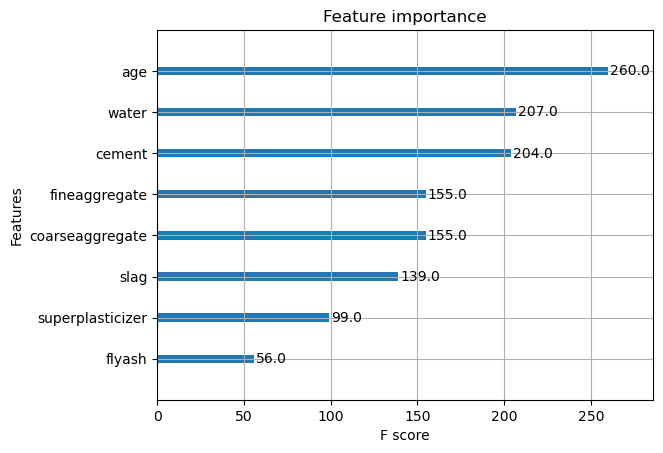

In [33]:
import matplotlib.pyplot as plt
 
xgb.plot_importance(best_model, importance_type='weight')
plt.show()


In [34]:
##pip install shap


Note: you may need to restart the kernel to use updated packages.


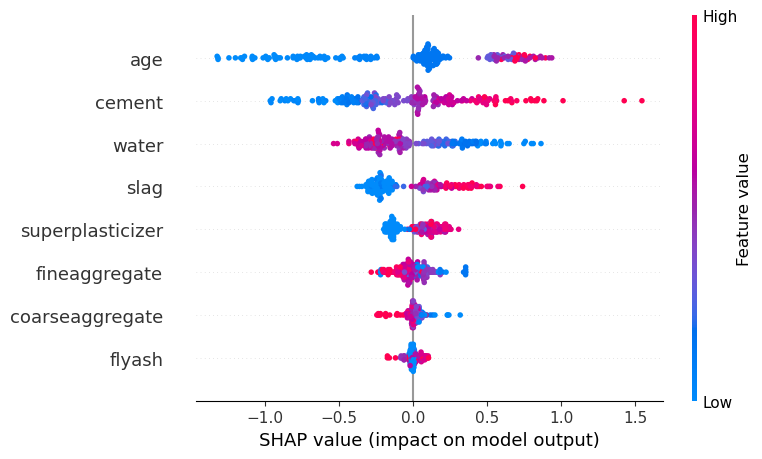

In [35]:
import shap


explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


- Grafiğe göre age değişkeninin bağımlıda en çok etkisi olan değişken olarak duruyor ki bu bilgi genel geçer olan bilgiyle de uyum sağlıyor Betonun mukavemetini kazandığı süre dökülüp priz yapmaya başladığı süreden ilk 28 gün içinde gerçekleşir 28 günün sonunda ama mukavemet alması durmaz yalnızca azalır ve sabit bir değere doğru yaklaşma eğilimi gösterir 28 gün sadece kritik süredir

- Age değişkenini cement, water ve slang(curuf) değişkenleri izliyor 

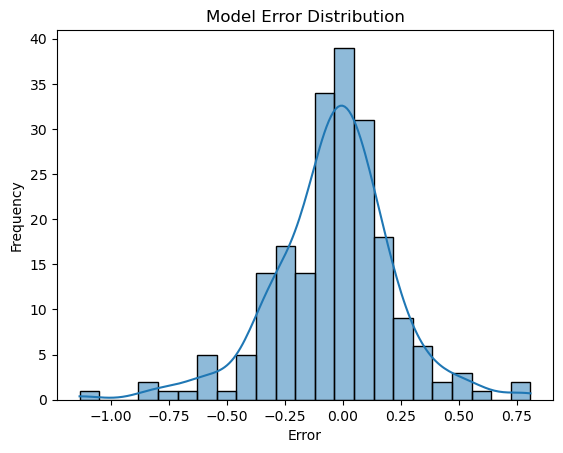

In [38]:
import seaborn as sns


errors = y_pred - y_test


sns.histplot(errors, kde=True)
plt.title("Model Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


### Overfit Check

In [40]:
from sklearn.metrics import mean_squared_error, r2_score


y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R²: {train_r2}, Test R²: {test_r2}")


Train MSE: 0.020268201525655845, Test MSE: 0.06954657178970677
Train R²: 0.9801081822743467, Test R²: 0.9247494051506773


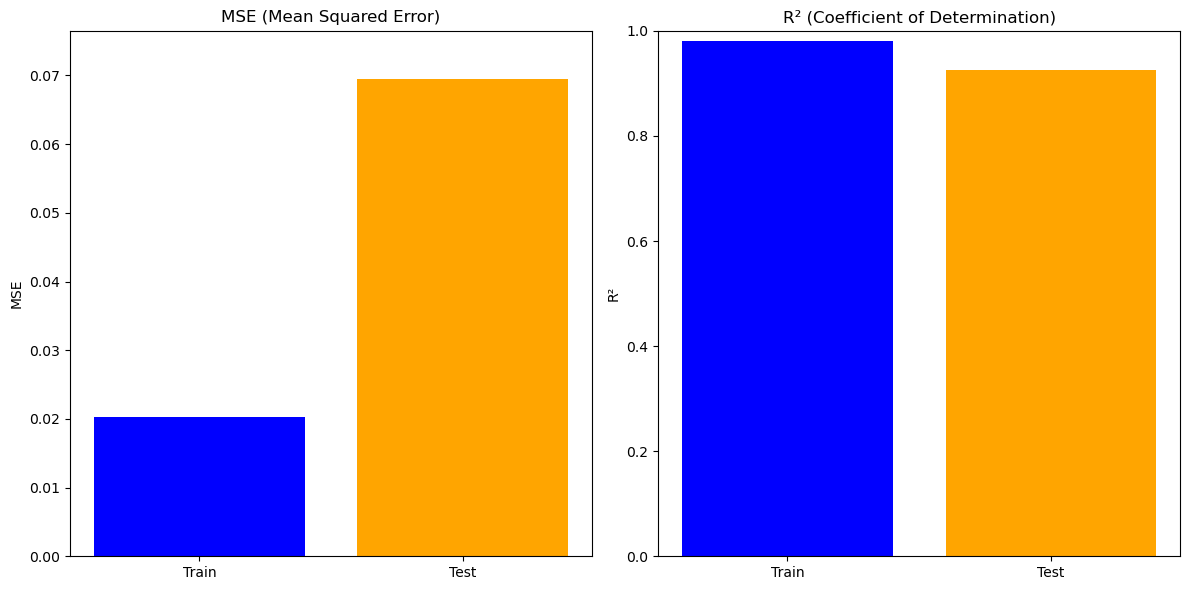

In [41]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['Train', 'Test']
mse_values = [0.020268201525655845, 0.06954657178970677]
r2_values = [0.9801081822743467, 0.9247494051506773]


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].bar(metrics, mse_values, color=['blue', 'orange'])
ax[0].set_title('MSE (Mean Squared Error)')
ax[0].set_ylabel('MSE')
ax[0].set_ylim(0, max(mse_values) * 1.1)


ax[1].bar(metrics, r2_values, color=['blue', 'orange'])
ax[1].set_title('R² (Coefficient of Determination)')
ax[1].set_ylabel('R²')
ax[1].set_ylim(0, 1)

plt.tight_layout()


plt.show()



Eğitim MSE çok düşük (0.020), bu modelin eğitim verisiyle çok iyi uyum sağladığını gösterir.

Test MSE ise biraz daha yüksek (0.069), ancak bu fark çok büyük değil. Bu, modelin genel olarak test verisiyle de iyi bir performans sergilediğini gösteriyor.

Eğitim R² 0.98 gibi çok yüksek bir değer ve bu modelin eğitim verisiyle mükemmel uyum sağladığını gösteriyor.

Test R² 0.92 de oldukça yüksek ve test verisiyle de iyi bir performans elde ettiğinizi gösteriyor.

Sonuç olarak, overfitting endişesi taşımamıza gerek yok gibi görünüyor. Modelimizin performansı her iki veri setinde de iyi görünüyor.

## Yapay Sinir Ağları

In [45]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


mlp_model = MLPRegressor(random_state=42, max_iter=1000)


mlp_model.fit(X_train, y_train)


y_train_pred = mlp_model.predict(X_train)

y_test_pred = mlp_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R²: {train_r2}, Test R²: {test_r2}")


Train MSE: 0.0565214579583237, Test MSE: 0.11136842222646813
Train R²: 0.9445281547121004, Test R²: 0.8794974388484147


#### Hiperparametre Ayarlamaları

#####  1. hidden_layer_sizes (Gizli Katman Sayısı ve Nöron Sayısı)

Bu parametre, modeldeki gizli katman sayısını ve her bir katmandaki nöron sayısını belirler. Yapay sinir ağlarında, gizli katmanlar, veriyi modellemek için önemli olan ara temsil seviyelerini öğrenir.

Nasıl Ayarlanır?

Daha fazla katman ve nöron, modelin daha karmaşık ilişkileri öğrenmesini sağlar, ancak aşırı karmaşık hale gelirse overfitting'e yol açabilir.

Küçük veri setleri ve karmaşık olmayan ilişkiler için genellikle daha az katman (1 veya 2 katman) tercih edilir.

Başlangıç Değeri: (100,) veya (50, 50) gibi 1 veya 2 katmanlı yapı.

Overfitting ile İlişkisi:
    
Çok büyük bir model, yani çok sayıda nöron ve katman kullanmak, overfitting'e yol açabilir. Bu nedenle modelin karmaşıklığını arttırırken dikkatli olmak önemlidir.





##### 2. activation (Aktivasyon Fonksiyonu)

Aktivasyon fonksiyonları, ağın her nöronunun çıktısını değiştiren fonksiyonlardır. relu ve tanh gibi seçenekler yaygın olarak kullanılır.

Nasıl Ayarlanır?

relu: Daha hızlı eğitim sağlar, genellikle daha iyi sonuçlar verir, özellikle derin ağlarda.

tanh: Veri setinin negatif ve pozitif değerlerini aynı şekilde temsil etmeye çalışır ve daha dengeli çıktılar verir, ancak eğitim süresi genellikle daha uzun olabilir.

Overfitting ile İlişkisi:

relu çoğu durumda iyi sonuçlar verir ve overfitting'i engellemeye yardımcı olabilir, çünkü çıkışlar pozitif olacağı için ağın genelleme yeteneği artar.




##### 3. solver (Optimizasyon Algoritması)

Bu parametre, ağın ağırlıklarını nasıl optimize edeceğini belirler. adam, sgd, lbfgs gibi algoritmalar mevcut.

Nasıl Ayarlanır?

adam: Çoğu durumda iyi performans gösteren bir optimizasyon algoritmasıdır ve genellikle daha hızlı bir şekilde sonuç verir. Karmaşık ağlarda adam tercih edilir.

sgd: Daha düşük hızda, ama daha stabil sonuçlar verir. Çok büyük veri setleri için uygun olabilir.

lbfgs: Genellikle daha az yaygın kullanılır ama karmaşık fonksiyonları optimize etmekte oldukça etkilidir.

Overfitting ile İlişkisi:

adam, genellikle overfitting'i daha iyi kontrol eder ve daha hızlı sonuçlar sağlar. Ancak, parametrelerin doğru ayarlandığından emin olun.

##### 4. alpha (Ağırlık Regülasyonu)

Bu parametre, modelin ağırlıkları üzerinde uygulanan L2 ceza terimi ile ilişkilidir. Regülasyon, modelin karmaşıklığını sınırlayarak overfitting'i engellemeye yardımcı olur.

Nasıl Ayarlanır?

Küçük alpha değerleri (örneğin, 0.0001, 0.001) modelin fazla regüle edilmesine neden olabilir ve modelin daha basit öğrenmesine yol açabilir.

Büyük alpha değerleri (örneğin, 0.1) modelin öğrenmesini sınırlayabilir ve aşırı regülasyon nedeniyle daha düşük performans gösterebilir.

Overfitting ile İlişkisi:

alpha'nın yüksek değerleri, overfitting'i engellemeye yardımcı olur. Ancak çok yüksek değerler, modelin veriyi yeterince öğrenmemesine sebep olabilir (underfitting).

##### 5. learning_rate (Öğrenme Oranı)

Öğrenme oranı, modelin her adımda ne kadar büyük bir değişiklik yapacağını belirler.

Nasıl Ayarlanır?

constant: Öğrenme oranı sabittir, genellikle daha stabil sonuçlar sağlar.

adaptive: Öğrenme oranı, eğitim sırasında kendini ayarlar. Başlangıçta büyük olabilir, ancak daha sonra küçülür. Çoğu durumda adaptive daha iyi performans gösterir.

Overfitting ile İlişkisi:

Düşük öğrenme oranı, modelin daha stabil eğitilmesini sağlar, ancak fazla küçükse modelin yeterince hızlı öğrenememesi nedeniyle performans düşebilir.

Yüksek öğrenme oranları, hızlı öğrenme sağlar ancak overfitting'e yol açabilir.

##### 6. max_iter (Maksimum İterasyon Sayısı)

Bu parametre, modelin eğitilmesi için izin verilen maksimum iterasyon sayısını belirler. Daha fazla iterasyon, modelin daha iyi öğrenmesini sağlar, ancak aşırı iterasyonlar, overfitting'e neden olabilir.

Nasıl Ayarlanır?

Başlangıçta 1000 gibi bir değer uygundur.

Eğitim sırasında kayıplar (loss) düşmeye devam ediyorsa, max_iter değerini artırmak faydalı olabilir.

Overfitting ile İlişkisi:

Çok düşük iterasyon sayısı, modelin yeterince öğrenmesini engelleyebilir (underfitting).

Çok yüksek iterasyon sayısı, overfitting'e neden olabilir.

##### Genel Tavsiyeler:

Veri Seti Boyutu ve Karmaşıklığı:
    
Küçük veri setlerinde, genellikle daha az gizli katman (1 veya 2 katman) ve daha az nöron kullanmak daha iyi sonuçlar verir.

Büyük veri setlerinde, ağın daha derin olması ve daha fazla nöron kullanılması gerekebilir, ancak early stopping veya dropout gibi tekniklerle overfitting'i kontrol etmek önemlidir.

Overfitting ile İlişkisi:
    
Regülasyon (alpha), daha az katman ve nöron kullanımı, daha düşük öğrenme oranı ve erken durdurma (early stopping) gibi teknikler, overfitting'i engellemeye yardımcı olur.

Modelin Genel İyileştirilmesi İçin:
    
İlk olarak, parametre grid'ini daha geniş tutarak GridSearchCV veya RandomizedSearchCV ile hiperparametre optimizasyonu yapabilirsiniz.

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50)], 
    'activation': ['relu'], 
    'solver': ['adam'], 
    'alpha': [0.0001], 
    'learning_rate': ['adaptive'] 
}


grid_search = GridSearchCV(MLPRegressor(max_iter=300, random_state=42), 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)  


grid_search.fit(X_train, y_train)


print(f"En iyi parametreler: {grid_search.best_params_}")


best_mlp_model = grid_search.best_estimator_


y_train_pred_best = best_mlp_model.predict(X_train)


y_test_pred_best = best_mlp_model.predict(X_test)


train_mse_best = mean_squared_error(y_train, y_train_pred_best)
test_mse_best = mean_squared_error(y_test, y_test_pred_best)

train_r2_best = r2_score(y_train, y_train_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)

print(f"Train MSE: {train_mse_best}, Test MSE: {test_mse_best}")
print(f"Train R²: {train_r2_best}, Test R²: {test_r2_best}")


En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Train MSE: 0.04670695230847703, Test MSE: 0.10482141278291614
Train R²: 0.9541604033951925, Test R²: 0.8865814164253559


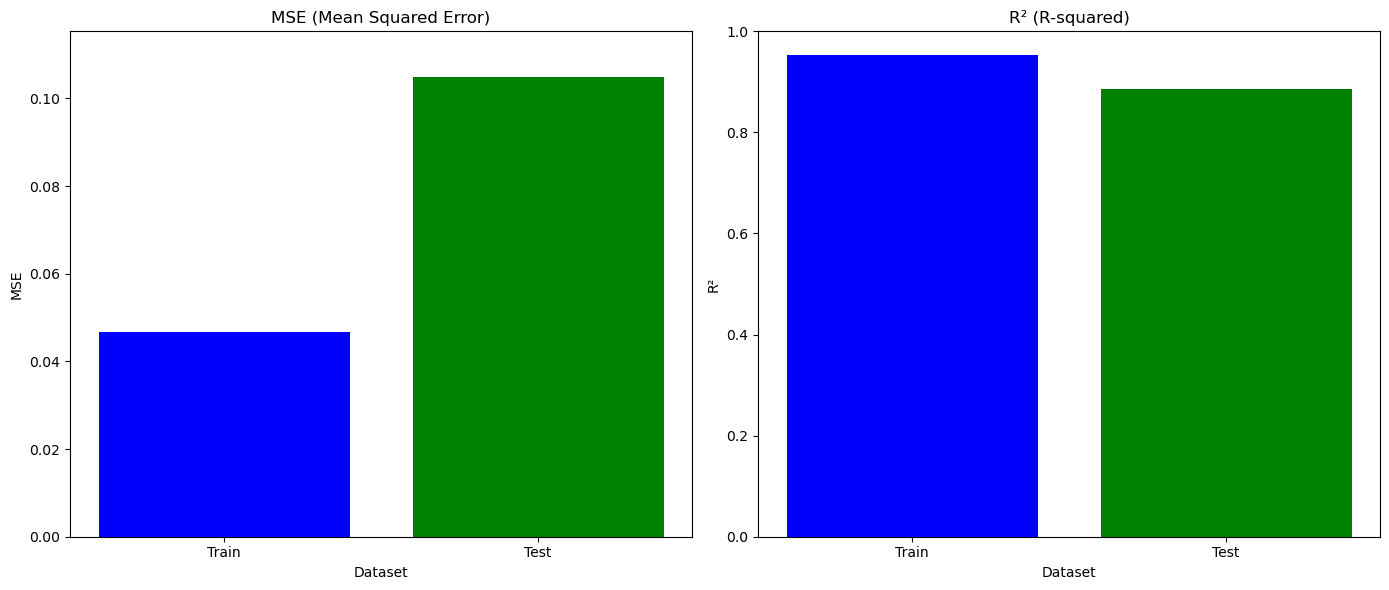

In [77]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['Train', 'Test']
mse_values = [train_mse_best, test_mse_best]
r2_values = [train_r2_best, test_r2_best]


fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].bar(metrics, mse_values, color=['blue', 'green'])
ax[0].set_title("MSE (Mean Squared Error)")
ax[0].set_ylabel("MSE")
ax[0].set_xlabel("Dataset")
ax[0].set_ylim([0, max(mse_values) * 1.1])


ax[1].bar(metrics, r2_values, color=['blue', 'green'])
ax[1].set_title("R² (R-squared)")
ax[1].set_ylabel("R²")
ax[1].set_xlabel("Dataset")
ax[1].set_ylim([0, 1])

# Göster
plt.tight_layout()
plt.show()


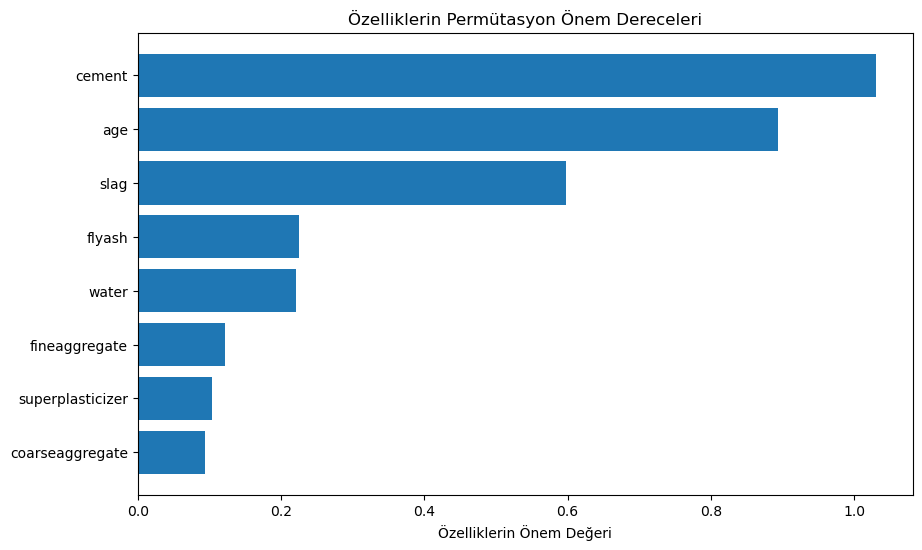

In [81]:
from sklearn.inspection import permutation_importance


result = permutation_importance(best_mlp_model, X_test, y_test, n_repeats=10, random_state=42)


import matplotlib.pyplot as plt


importance = result.importances_mean


indices = importance.argsort()


plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), importance[indices], align='center')
plt.yticks(range(X_test.shape[1]), [X_test.columns[i] for i in indices])
plt.xlabel("Özelliklerin Önem Değeri")
plt.title("Özelliklerin Permütasyon Önem Dereceleri")
plt.show()


### 2. Permutation Importance:

Permutation Importance modelin performansını (genellikle doğruluğunu veya MSE'yi) bir özellik karıştırıldığında ne kadar kötüleştiğine bakarak ölçer. Bu yöntem, modelin genel başarısını test eder ve bir özelliğin önemini daha doğrudan gösterir. Eğer bir özellik, modelin doğruluğuna çok önemli bir katkı sağlıyorsa, bu özellik karıştırıldığında performansta büyük bir düşüş görülür.

Hangisini Baz Almalıyız?

XGBoost Feature Importance: Bu, modelin içinde yer alan ağaç yapısına dayalı bir analizdir. Bu metrik modelin öğrenme sürecinde hangi özelliklerin önemli olduğunu gösterir. Ancak, bazen bu yöntemde özellikler arası etkileşimler göz ardı edilebilir ve sadece tek başlarına özelliklerin önemine odaklanabilir.

Permutation Importance: Bu yöntem modelin genel performansını doğrudan ölçer, ve genellikle bağımsız özelliklerin etkilerini daha iyi analiz eder. Özellikle, modelin tahmin doğruluğunun değişmesine bakarak hangi özelliklerin katkı sağladığını daha net gösterir.

Yorum yaparken şunları göz önünde bulunduracağız:

Eğer XGBoost ile özelliklerin katkısı hakkında genel bir fikir edinmek istiyorsak, XGBoost'un feature importance sonuçları size hızlı bir bilgi verebilir.

Eğer özelliklerin model performansına olan gerçek katkısını anlamak istiyorsak, Permutation Importance genellikle daha güvenilir bir yöntem olabilir. Özellikle,
modelin doğruluğunu doğrudan etkileyen özelliklerin önemini görmek istiyorsanız, Permutation Importance'ı baz almanız daha faydalıdır.

Sonuç olarak:

XGBoost Feature Importance modelin iç yapısına dayalı ve ağaç tabanlı algoritmalar için çok yararlıdır.

Permutation Importance daha genel ve doğrudan modelin doğruluğu üzerindeki etkileri gösterdiği için modelin gerçek performansına katkı sağlama düzeyine odaklanır.

Her iki yöntemi de birleştirerek özelliklerin modele olan katkılarını daha kapsamlı bir şekilde yorumlayabilirsiniz. Örneğin, eğer XGBoost’un gösterdiği önemli bir özellik, Permutation Importance testinde de çok büyük bir performans düşüşüne yol açıyorsa, bu özellik gerçekten önemli demektir.

## KNN Regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')


knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

print(f"KNN Model MSE: {knn_mse}")
print(f"KNN Model R²: {knn_r2}")

KNN Model MSE: 0.26866459137424575
KNN Model R²: 0.7093002603062248


### Hiperparametre analizi ve model iyileştirme

#### 1. n_neighbors

Açıklama: n_neighbors parametresi, her bir tahmin için kaç komşuya bakılacağını belirler. Bu değer küçükse model, gürültüyü daha fazla dikkate alabilir (overfitting riski), çok büyükse de model daha fazla genellemeye yönelir (underfitting riski).

Overfitting / Underfitting:

Küçük n_neighbors: Çok küçük değerler (örneğin 1 veya 3) modelin her veri noktasına çok hassas olmasına, dolayısıyla overfitting durumuna yol açabilir. Model, her veri noktasına çok yakın komşuları dikkate alır, ancak bu genelleme yeteneğini azaltabilir.

Büyük n_neighbors: Çok büyük değerler (örneğin 50 veya 100), modelin daha genelleştirici olmasına ve underfitting durumuna yol açabilir çünkü daha fazla komşuya bakılırken model çok fazla genelleme yapar.

Veri türü ve boyutu:

Küçük verisetlerinde n_neighbors değeri daha küçük tutulabilir, çünkü fazla komşuya bakmak, her bir veri noktasının çevresindeki daha geniş komşulukları etkileyebilir.

Büyük verisetlerinde n_neighbors değerinin artırılması genellikle daha iyi sonuçlar verir çünkü daha geniş bir komşuluk ile daha sağlam bir genelleme sağlanır.
İpucu: n_neighbors'i optimize etmek için cross-validation kullanılabilir. Tipik olarak 5 ila 15 arası komşular iyi bir başlangıç olabilir.

#### 2. weights

Açıklama: Komşuların etkilerini nasıl hesaplayacağınızı belirler:

'uniform': Her komşuya eşit ağırlık verir.
'distance': Komşulara, uzaklıklarına göre ağırlık verir. Daha yakın komşuların etkisi daha fazla olur.
Overfitting / Underfitting:

'uniform': Bu seçenek genellikle daha genelleyici sonuçlar üretir, ancak bazı durumlarda, uzak komşuların etkisini aynı derecede almak, modelin doğruluğunu azaltabilir.
'distance': Eğer komşuların uzaklıkları önemliyse, daha doğru bir model elde edilebilir. Ancak, çok uzak komşuların etkisi fazla olsa da bu, overfitting'e yol açabilir, çünkü uzak komşular verideki gürültüyü de birlikte getirebilir.
Veri türü ve boyutu:

Küçük, temiz ve homojen verilerde uniform iyi sonuç verebilir.
Büyük ve karmaşık verilerde veya veride farklı yoğunluklar varsa, distance daha iyi performans verebilir.
İpucu: Eğer verinizde yüksek doğruluklu ve temiz komşuluklar varsa, uniform iyidir. Ancak, uzak komşuların etkilerini dikkate almak istiyorsanız distance kullanmalısınız.

#### 3. algorithm
Açıklama: Bu parametre, komşuları arama algoritmasını seçer:

'auto': Veriye bağlı olarak uygun algoritmayı seçer.
'ball_tree': Çok büyük verisetleri için optimize edilmiş bir algoritmadır. Özellikle yüksek boyutlu verilerde daha verimli olabilir.
'kd_tree': Düşük ve orta boyutlu verilerde genellikle hızlıdır.
'brute': Tüm komşuları brute-force yöntemiyle arar. Küçük verisetlerinde iyi çalışır, ancak büyük verilerde çok yavaş olabilir.
Overfitting / Underfitting:

Algoritmanın kendisi overfitting ya da underfitting'e doğrudan etki etmez, ancak seçim doğru yapılmazsa eğitim süresi uzar veya doğruluk düşebilir.
Veri türü ve boyutu:

Büyük verisetlerinde 'ball_tree' veya 'kd_tree' daha verimli olabilir. Küçük verilerde ise 'brute' yeterli olabilir.
İpucu: Genellikle 'auto' parametresi iyi bir seçenektir, ancak yüksek boyutlu verilerde 'ball_tree' daha verimli olabilir.

#### 4. leaf_size
Açıklama: KNN algoritmasında kullanılan veri yapısının büyüklüğünü belirler. Özellikle büyük verisetlerinde önemli bir parametredir.

Veri türü ve boyutu:

Büyük verisetlerinde leaf_size değeri arttırılabilir, bu genellikle hızlandırma sağlar.
Küçük verisetlerinde leaf_size değeri çok etkili olmayacaktır.
İpucu: Genellikle 30 ile 100 arası iyi bir başlangıç noktasıdır. Ancak, büyük verilerle çalışırken bu parametreyi artırmak eğitim süresini azaltabilir.

#### 5. p (Mesafe Ölçütü)
Açıklama: KNN algoritmasında mesafe ölçütünü belirler:

p=1: Manhattan mesafesini kullanır (L1 normu).
p=2: Euclidean mesafesini kullanır (L2 normu).
Overfitting / Underfitting:

p=1 (Manhattan): Çoğunlukla düşük boyutlu ve düzgün dağılan verilerde iyi çalışır.

p=2 (Euclidean): Verilerin her iki eksende de düzgün bir şekilde dağıldığı durumlarda iyi çalışır.

Veri türü ve boyutu:

Verinizin yapısına göre, p=2 genellikle daha yaygın ve başarılıdır.

p=1 daha fazla komşu bağımlılığı olan verilerde iyi sonuç verebilir.

İpucu: Çoğu durumda p=2 kullanmak iyi bir seçenek olsa da, verinizin türüne göre p=1 de denenebilir.

Genel Öneriler:

Veri Boyutu: Eğer veri setiniz küçükse, n_neighbors değerini düşük tutmak (örneğin 3-5) ve 'uniform' ağırlıkları kullanmak daha iyi olabilir.

Veri Boyutu ve Karmaşıklığı: Eğer veri setiniz büyükse, n_neighbors değerini artırmak (örneğin 15-20) genellikle daha iyi performans sağlar. 'distance' ağırlıkları ve uygun algoritmayı seçmek (örneğin ball_tree) daha verimli olacaktır.

Model Hızlandırma: Büyük verilerle çalışırken algorithm parametresini 'ball_tree' veya 'kd_tree' olarak ayarlayarak hızlandırma sağlayabilirsiniz.

Hiperparametrelerinizi GridSearchCV veya RandomizedSearchCV kullanarak optimize etmek, modelinize en iyi parametreleri bulmak için önemli bir adımdır. Bu şekilde, overfitting ve underfitting arasında doğru dengeyi kurabilirsiniz.

In [93]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': [3, 5, 7, 10],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'p': [1, 2]  # Mesafe ölçütü
}


grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)


grid_search_knn.fit(X_train, y_train)


print(f"En iyi parametreler: {grid_search_knn.best_params_}")


best_knn_model = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)


best_knn_mse = mean_squared_error(y_test, y_pred_best_knn)
best_knn_r2 = r2_score(y_test, y_pred_best_knn)

print(f"En İyi KNN Model MSE: {best_knn_mse}")
print(f"En İyi KNN Model R²: {best_knn_r2}")


Fitting 5 folds for each of 64 candidates, totalling 320 fits
En iyi parametreler: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
En İyi KNN Model MSE: 0.21067361519540537
En İyi KNN Model R²: 0.7720475006237772


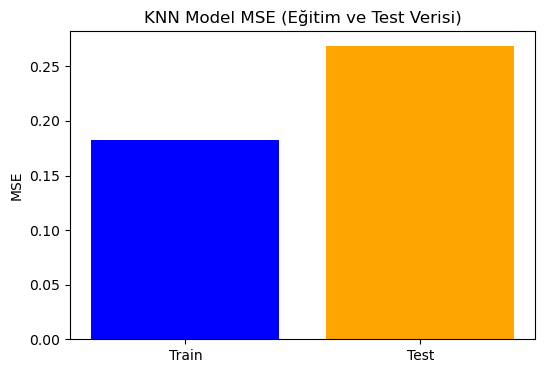

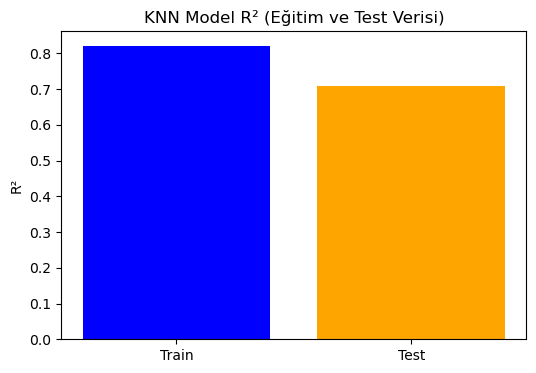

In [95]:
import matplotlib.pyplot as plt


train_mse_knn = mean_squared_error(y_train, knn_model.predict(X_train))
test_mse_knn = mean_squared_error(y_test, y_pred_knn)


labels = ['Train', 'Test']
mse_values = [train_mse_knn, test_mse_knn]

plt.figure(figsize=(6, 4))
plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.title('KNN Model MSE (Eğitim ve Test Verisi)')
plt.ylabel('MSE')
plt.show()


train_r2_knn = r2_score(y_train, knn_model.predict(X_train))
test_r2_knn = r2_score(y_test, y_pred_knn)


r2_values = [train_r2_knn, test_r2_knn]

plt.figure(figsize=(6, 4))
plt.bar(labels, r2_values, color=['blue', 'orange'])
plt.title('KNN Model R² (Eğitim ve Test Verisi)')
plt.ylabel('R²')
plt.show()
